<a href="https://colab.research.google.com/github/luciekash/WebApp/blob/master/Introduction_to_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. You have access to behavior data about subscribers who have already switched to the new plans (from the project for the Statistical Data Analysis course). For this classification task, you need to develop a model that will pick the right plan. Since you’ve already performed the data preprocessing step, you can move straight to creating the model. Develop a model with the highest possible accuracy. In this project, the threshold for accuracy is 0.75. Check the accuracy using the test dataset.

Open and look through the data file.
Split the source data into a training set, a validation set, and a test set.
Investigate the quality of different models by changing hyperparameters. Briefly describe the findings of the study.
Check the quality of the model using the test set.
Additional task: sanity check the model. This data is more complex than what you’re used to working with, so it's not an easy task. We'll take a closer look at it later.

In [10]:
#importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

#reading the data 
data = pd.read_csv('https://bit.ly/UsersBehaviourTelco')
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


## DATA EXPLORATION

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


# DATA CLEANING AND PREPARATION

In [5]:
data.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [7]:
data['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

the data seems to be good it has no missing values.

# Split the source data into a training set, a validation set and a test set.

In [6]:
target = data['is_ultra']

features = data.drop(['is_ultra'], axis=1)

# set aside 20% of train and test data for evaluation
features_train, features_test, target_train, target_test = train_test_split(features, target,
    test_size=0.2, shuffle = True, random_state = 12345)

features_train, features_valid, target_train, target_valid = train_test_split(

    features, target, test_size=0.25, random_state=12345
)
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(2410, 4)
(2410,)
(804, 4)
(804,)
(643, 4)
(643,)


# Investigate the quality of different models by changing hyperparameters.

In [8]:
#import classifers 
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifer


In [12]:
#Finding accuracy score for DecisionTreeClassifier
result = []
for depth in range(1, 10):
        model =  DecisionTreeClassifier(random_state=12345,max_depth=depth)

        model.fit(features_train, target_train)

       
        predictions_valid = model.predict(features_valid)

      

        print("max_depth =", depth, ": ", end='')
        print(accuracy_score(target_valid, predictions_valid))

max_depth = 1 : 0.75
max_depth = 2 : 0.7835820895522388
max_depth = 3 : 0.7885572139303483
max_depth = 4 : 0.7810945273631841
max_depth = 5 : 0.7810945273631841
max_depth = 6 : 0.7661691542288557
max_depth = 7 : 0.7898009950248757
max_depth = 8 : 0.7885572139303483
max_depth = 9 : 0.7885572139303483


The best possible option here is max_depth = 7. We found our tree depth.
The best possible accuracy obtained within this loop is : 0.7898009950248757

In [33]:
#Calculating rmse of DecisionTreeClassifier model for max_depth=7
model = DecisionTreeClassifier(random_state=12345,max_depth=7)
model.fit(features_train, target_train) # < train the model >
predictions_valid = model.predict(features_valid) # < find the predictions using validation set >

acc_decision_tree = accuracy_score(target_valid, predictions_valid)
print('Accuracy score of DecisionTreeClassifier model is:', acc_decision_tree) #the lowest, the best.
print()
rmse_tree = mean_squared_error(target_valid, predictions_valid)**0.5
print('Rmse for DecisionTreeClassifier (with max_depth=4) is:', rmse_tree)

Accuracy score of DecisionTreeClassifier model is: 0.7898009950248757

Rmse for DecisionTreeClassifier (with max_depth=4) is: 0.45847465030808887


In [32]:
#Finding Rmse for RandomForestClassifier, criterion=gini
result=[]

for estim in range(10, 51, 5):
        model = RandomForestClassifier(n_estimators=estim, criterion='gini', max_depth=10, random_state=12345)
        model.fit(features_train, target_train) # < train the model >
        predictions_valid = model.predict(features_valid) 
       
        acc_rfc = accuracy_score(target_valid, predictions_valid)
        rmse = mean_squared_error(target_valid, predictions_valid)**0.5
        print("n_estimators =", estim, "Rmse:", rmse)
        print('n_estimators =', estim, 'Accuracy:', acc_rfc)
        result.append(acc_rfc)
        print()
print('Rmse for RandomForestClassifier (criterion=gini and estimators=estim) is:', rmse) #the lowest, the best.       
print('The best possible accuracy obtained tuning this hyperparameter is :', max(result))


n_estimators = 10 Rmse: 0.44609973674547054
n_estimators = 10 Accuracy: 0.8009950248756219

n_estimators = 15 Rmse: 0.43765544502178183
n_estimators = 15 Accuracy: 0.8084577114427861

n_estimators = 20 Rmse: 0.44048819592160315
n_estimators = 20 Accuracy: 0.8059701492537313

n_estimators = 25 Rmse: 0.43907410496605387
n_estimators = 25 Accuracy: 0.8072139303482587

n_estimators = 30 Rmse: 0.44189776175128564
n_estimators = 30 Accuracy: 0.804726368159204

n_estimators = 35 Rmse: 0.44048819592160315
n_estimators = 35 Accuracy: 0.8059701492537313

n_estimators = 40 Rmse: 0.436232171512701
n_estimators = 40 Accuracy: 0.8097014925373134

n_estimators = 45 Rmse: 0.43907410496605387
n_estimators = 45 Accuracy: 0.8072139303482587

n_estimators = 50 Rmse: 0.44189776175128564
n_estimators = 50 Accuracy: 0.804726368159204

Rmse for RandomForestClassifier (criterion=gini and estimators=estim) is: 0.44189776175128564
The best possible accuracy obtained tuning this hyperparameter is : 0.809701492537

In [30]:
#Finding Rmse values for LogisticRegression

result=[]
for scale in range(1, 10):
        model = LogisticRegression(random_state=8, solver='liblinear', max_iter=100, intercept_scaling=scale)
        model.fit(features_train, target_train) # < train the model >
        predictions_valid = model.predict(features_valid) 
        # < write code here >
        acc_lr = accuracy_score(target_valid, predictions_valid)
        rmse = mean_squared_error(target_valid, predictions_valid)**0.5
        print("Intercept scaling =", scale, "Rmse:", rmse)
        print('Intercept scaling=', scale, 'Accuracy', acc_lr)
        result.append(acc_lr)
        print()
print()
print('Optimal scale value equal to 3.')
print('The best possible accuracy obtained tuning this hyperparameter is :', max(result))



Intercept scaling = 1 Rmse: 0.4962546289118298
Intercept scaling= 1 Accuracy 0.753731343283582

Intercept scaling = 2 Rmse: 0.4962546289118298
Intercept scaling= 2 Accuracy 0.753731343283582

Intercept scaling = 3 Rmse: 0.4899487230759777
Intercept scaling= 3 Accuracy 0.7599502487562189

Intercept scaling = 4 Rmse: 0.4899487230759777
Intercept scaling= 4 Accuracy 0.7599502487562189

Intercept scaling = 5 Rmse: 0.4899487230759777
Intercept scaling= 5 Accuracy 0.7599502487562189

Intercept scaling = 6 Rmse: 0.4912163803644057
Intercept scaling= 6 Accuracy 0.7587064676616916

Intercept scaling = 7 Rmse: 0.4899487230759777
Intercept scaling= 7 Accuracy 0.7599502487562189

Intercept scaling = 8 Rmse: 0.49499987436553006
Intercept scaling= 8 Accuracy 0.7549751243781094

Intercept scaling = 9 Rmse: 0.4912163803644057
Intercept scaling= 9 Accuracy 0.7587064676616916


Optimal scale value equal to 3.
The best possible accuracy obtained tuning this hyperparameter is : 0.7599502487562189


# Model selection

In [35]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Logistic Regression'],
    'Score': [acc_decision_tree, acc_rfc, acc_lr]})
sorted_by_score = models.sort_values(by='Score', ascending=False)
sorted_by_score

,Model,Score
1,Random Forest,0.804726
0,Decision Tree,0.789801
2,Logistic Regression,0.758706


I retrain the Random Forest model since it's the best tuned model on the whole training set and test it on the test set

# Sanity Check

0    0.800995
1    0.199005
dtype: float64
0    0.800995
1    0.199005
dtype: float64


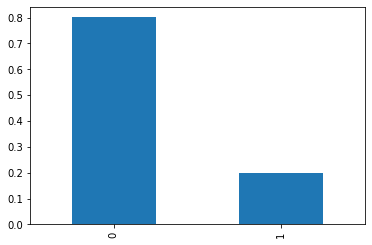

In [36]:
model = RandomForestClassifier(n_estimators=estim, criterion='gini', max_depth=10, random_state=12345)
model.fit(features_train, target_train)

# to make value_counts() work,
# we converted results to pd.Series
predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

print(class_frequency)

In [37]:
target_pred_constant = pd.Series(model.predict(features))
print(accuracy_score(target, target_pred_constant))

0.8696328562538892


Conclusion

In this project I have developed a binary classification model that analyzes subscribers' behavior and recommends one of the plans: Smart or Ultra.
From the descriptive statistics i performed, I didn't find any missing or duplicated values. The number of outliers was not significant. I decided to keep the data as is.

I tuned 3 learning algorithms to achieve the highest possible validation accuracy and thus select the best model. Random Forest model showed the highest score (80.47). I checked the model for sanity which had a accuracy score of (86.96)
 